# Example - Rasterizing Point Data

In [1]:
import json
from functools import partial

import geopandas
from shapely.geometry import box, mapping

from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_points_griddata, rasterize_points_radial

%matplotlib inline

## Load in geopackage data and add CRS

In [2]:
gdf = geopandas.read_file(
    "../../test/test_data/input/time_vector_data.geojson",
    crs="epsg:4326"
)

In [3]:
gdf.head()

,test_attr,test_str_attr,test_time_attr,geometry
0,1.3,dcf86619,5/21/2016 10:09:21 AM -05:00,POINT (-47.26681 44.21932)
1,1.3,dcf86619,5/21/2016 10:09:21 AM -05:00,POINT (-47.26680 44.21932)
2,1.9,dcf86619,5/21/2016 10:09:21 AM -05:00,POINT (-47.26681 44.21932)
3,1.3,dcf86619,5/21/2016 10:09:21 AM -05:00,POINT (-47.26680 44.21932)
4,1.3,dcf86619,5/21/2016 10:09:21 AM -05:00,POINT (-47.26679 44.21932)


## Convert to raster with GeoCube

See docs for [make_geocube](../geocube.rst#make-geocube)

## Load into grid with griddata nearest resampling

In [4]:
geo_grid = make_geocube(
    vector_data=gdf,
    measurements=['test_attr'],
    resolution=(-0.1, 0.00001),
    rasterize_function=rasterize_points_griddata,
)

In [5]:
geo_grid

<xarray.Dataset>
Dimensions:      (x: 12, y: 11)
Coordinates:
  * y            (y) float64 45.25 45.15 45.05 44.95 ... 44.55 44.45 44.35 44.25
  * x            (x) float64 -47.27 -47.27 -47.27 ... -47.27 -47.27 -47.27
    spatial_ref  int64 0
Data variables:
    test_attr    (y, x) float64 1.3 1.3 1.3 1.2 1.3 1.3 ... 2.3 1.3 1.9 1.3 1.3
Attributes:
    grid_mapping:  spatial_ref

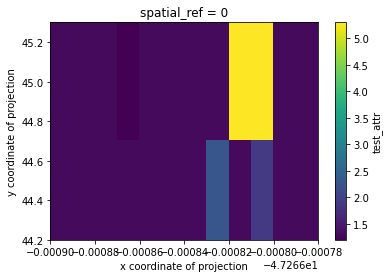

In [6]:
# mask nodata and plot
geo_grid.test_attr.where(geo_grid.test_attr!=geo_grid.test_attr.rio.nodata).plot()

## Load into grid with griddata cubic resampling

In [7]:
geo_grid = make_geocube(
    vector_data=gdf,
    measurements=['test_attr'],
    resolution=(-0.1, 0.00001),
    rasterize_function=partial(rasterize_points_griddata, method="cubic"),
)

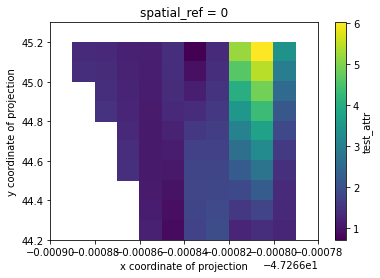

In [8]:
# mask nodata and plot
geo_grid.test_attr.where(geo_grid.test_attr!=geo_grid.test_attr.rio.nodata).plot()

## Load into user-defined grid with radial linear resampling

In [9]:
geo_grid = make_geocube(
    vector_data=gdf,
    measurements=['test_attr'],
    geom=json.dumps(mapping(box(-48, 44, -47, 45))),
    output_crs="epsg:3857",
    resolution=(-300, 300),
    rasterize_function=rasterize_points_radial,
)

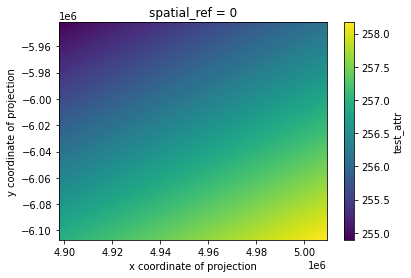

In [10]:
# mask nodata and plot
geo_grid.test_attr.where(geo_grid.test_attr!=geo_grid.test_attr.rio.nodata).plot()

## Load into user-defined grid with radial cubic resampling

Note: This example is simply to demonstrate the option and and
would need to be adjusted for better results. As seen in the plot below,
the values swelled quite a bit due to the input generating an 
ill-conditioned matrix.

In [11]:
geo_grid = make_geocube(
    vector_data=gdf,
    measurements=['test_attr'],
    geom=json.dumps(mapping(box(-48, 44, -47, 45))),
    output_crs="epsg:3857",
    resolution=(-300, 300),
    rasterize_function=partial(rasterize_points_radial, method="cubic", filter_nan=True),
)

/home/snowal/miniconda/envs/geocube/lib/python3.6/site-packages/scipy/interpolate/rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=3.16678e-18): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


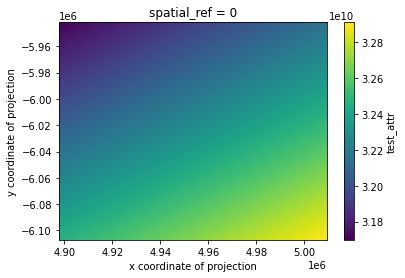

In [12]:
# mask nodata and plot
geo_grid.test_attr.where(geo_grid.test_attr!=geo_grid.test_attr.rio.nodata).plot()